In [20]:
import beamtest_analysis_helper as helper
from natsort import natsorted
from pathlib import Path
from glob import glob

In [ ]:
files = glob('/media/daq/X9/Run_nominal_alignment_12/loop_[0-2]/*nem')
#files = natsorted(files)
#files = files[30:90]
for file in files: print(file)
df = helper.toSingleDataFrame_newEventModel(files=files)

In [142]:
files = natsorted(list(Path('/media/daq/X9/Run_DESYFeb2024_Run_34/').glob('loop_9/*.bin')))
for file in files: print(file)
decode = helper.DecodeBinary(firmware_key=0b0001, board_id=[0x17f0f, 0x17f0f, 0x17f0f, 0x17f0f], file_list=files)
df = decode.decode_files()[0]
df.info()

/media/daq/X9/Run_DESYFeb2024_Run_34/loop_9/TDC_Data_0.bin
/media/daq/X9/Run_DESYFeb2024_Run_34/loop_9/TDC_Data_1.bin
/media/daq/X9/Run_DESYFeb2024_Run_34/loop_9/TDC_Data_2.bin
/media/daq/X9/Run_DESYFeb2024_Run_34/loop_9/TDC_Data_3.bin
/media/daq/X9/Run_DESYFeb2024_Run_34/loop_9/TDC_Data_4.bin
/media/daq/X9/Run_DESYFeb2024_Run_34/loop_9/TDC_Data_5.bin
/media/daq/X9/Run_DESYFeb2024_Run_34/loop_9/TDC_Data_6.bin
/media/daq/X9/Run_DESYFeb2024_Run_34/loop_9/TDC_Data_7.bin
/media/daq/X9/Run_DESYFeb2024_Run_34/loop_9/TDC_Data_8.bin
/media/daq/X9/Run_DESYFeb2024_Run_34/loop_9/TDC_Data_9.bin
/media/daq/X9/Run_DESYFeb2024_Run_34/loop_9/TDC_Data_10.bin
/media/daq/X9/Run_DESYFeb2024_Run_34/loop_9/TDC_Data_11.bin
/media/daq/X9/Run_DESYFeb2024_Run_34/loop_9/TDC_Data_12.bin
/media/daq/X9/Run_DESYFeb2024_Run_34/loop_9/TDC_Data_13.bin
/media/daq/X9/Run_DESYFeb2024_Run_34/loop_9/TDC_Data_14.bin
/media/daq/X9/Run_DESYFeb2024_Run_34/loop_9/TDC_Data_15.bin
/media/daq/X9/Run_DESYFeb2024_Run_34/loop_9/TDC_Da

In [143]:
chip_labels = [0, 1, 2, 3]
chip_names = ["ET2_EPIR_Pair1", "ET2p01_BAR_4", "ET2p01_BAR_5", "ET2_EPIR_Pair4"]
# chip_labels = [0, 1, 2]
# chip_names = ["ET2_EPIR_Pair1", "ET2p01_BAR_4", "ET2_EPIR_Pair4"]
# offsets = [20, 20, 20, 20]
offset = 15
offsets = [offset for chiplabel in chip_labels]
high_voltages = [250, 260, 210, 260]
# high_voltages = [250, 250, 250]

fig_path = './'

chip_fignames = chip_names
chip_figtitles = [
    f"(Trigger) Pair1 HV{high_voltages[0]}V OS:{offsets[0]}",
    f"Bar4 HV{high_voltages[1]}V OS:{offsets[1]}",
    f"Bar5 HV{high_voltages[2]}V OS:{offsets[2]}",
    f"Pair4 HV{high_voltages[3]}V OS:{offsets[3]}"]
# chip_figtitles = [
#     f"(Trigger) Pair1 HV{high_voltages[0]}V OS:{offsets[0]}",
#     f"Bar4 HV{high_voltages[1]}V OS:{offsets[1]}",
#     f"Pair4 HV{high_voltages[2]}V OS:{offsets[2]}"]

In [144]:
helper.plot_occupany_map(df, chip_labels,chip_names, chip_figtitles, fig_tag="inclusive")

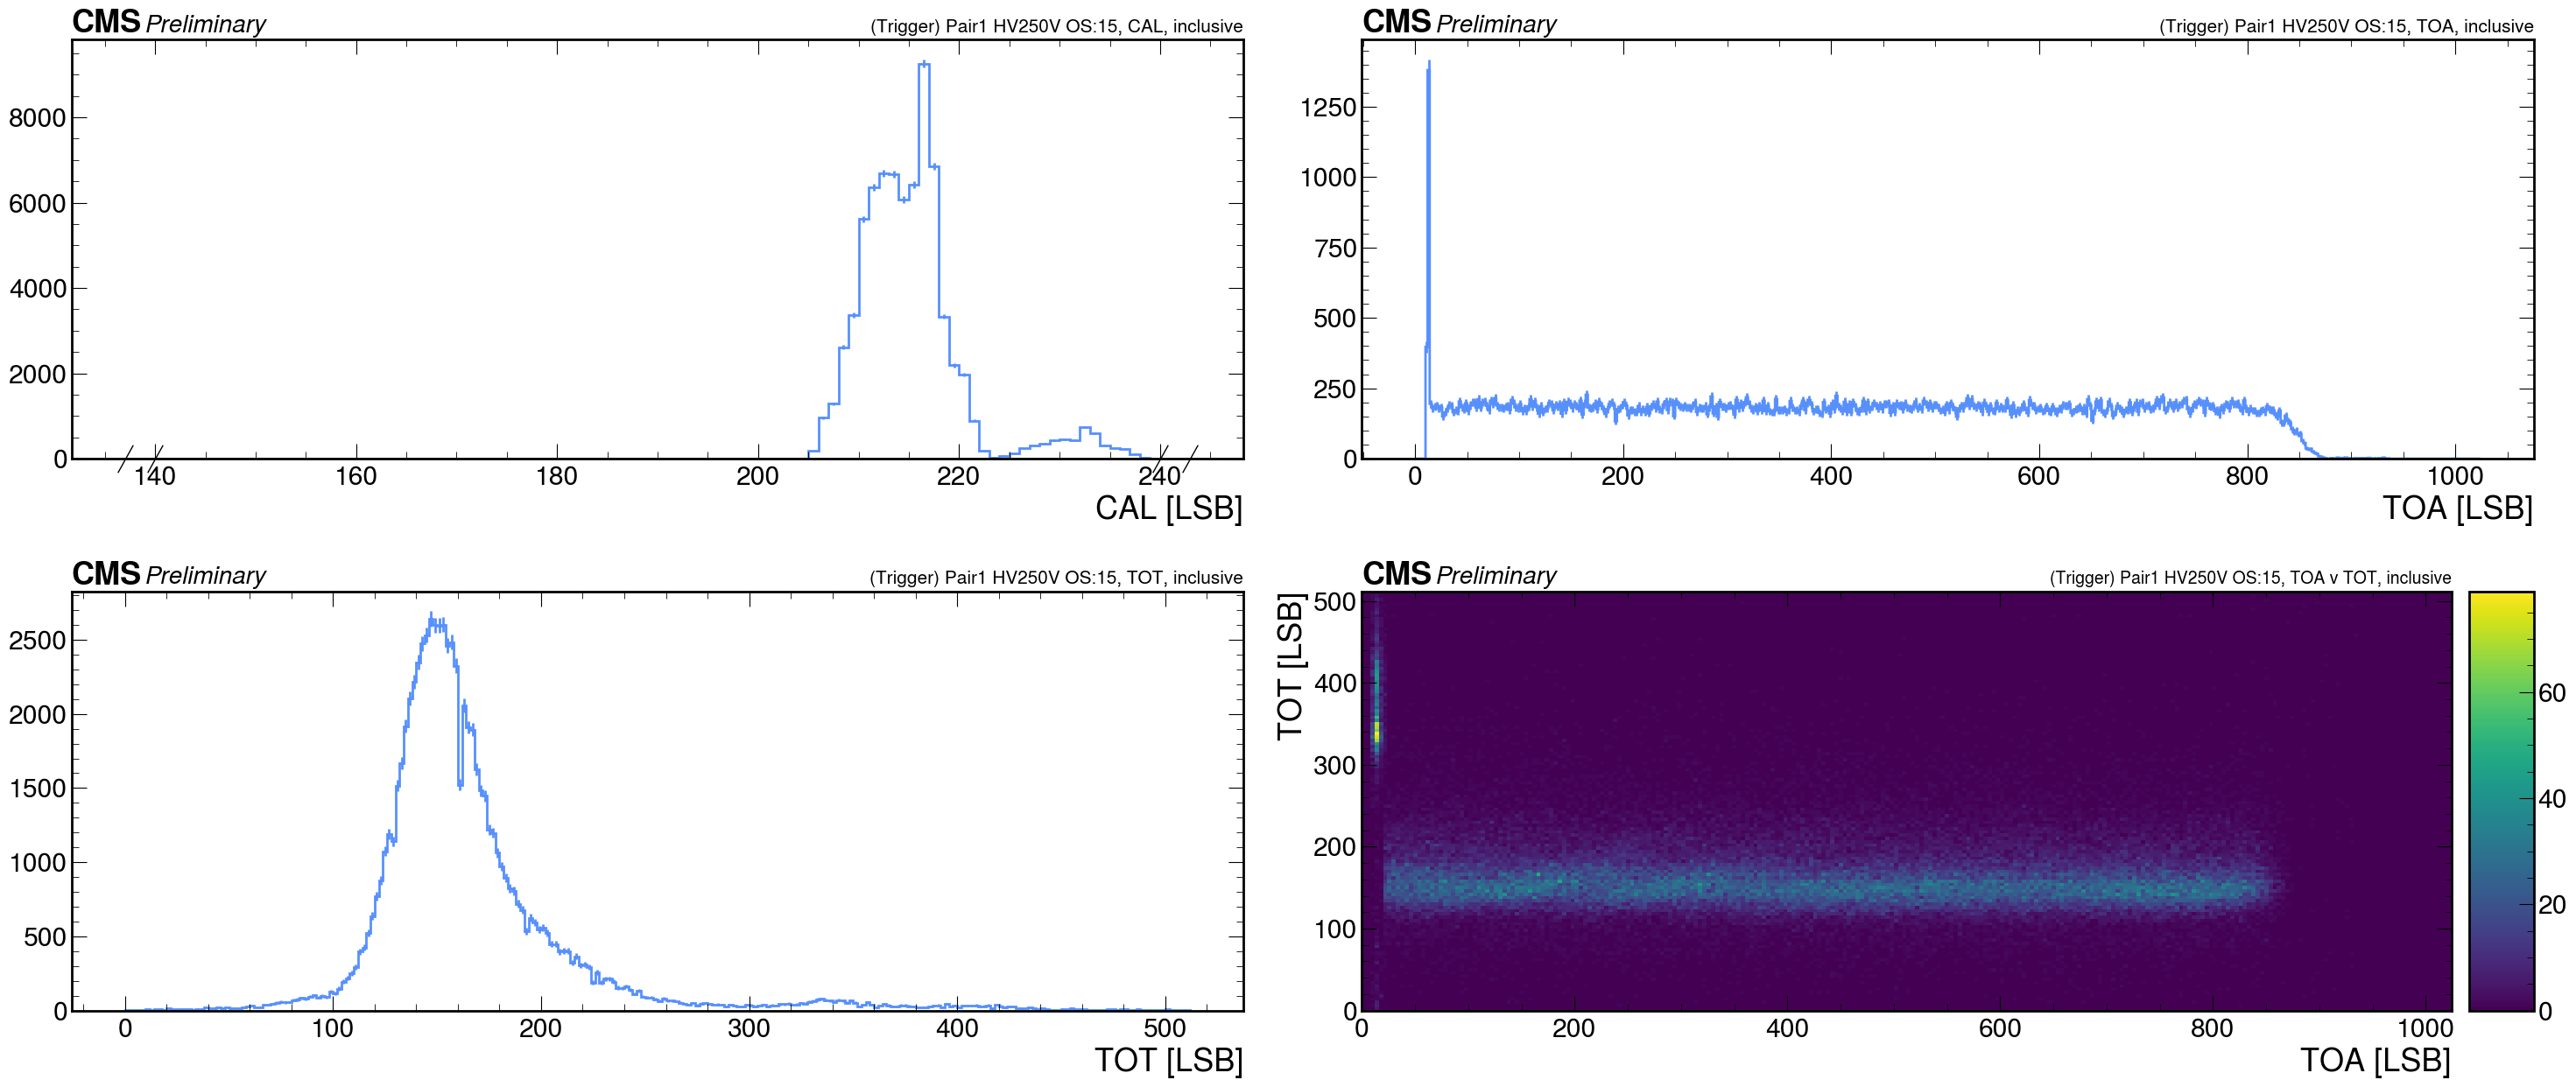

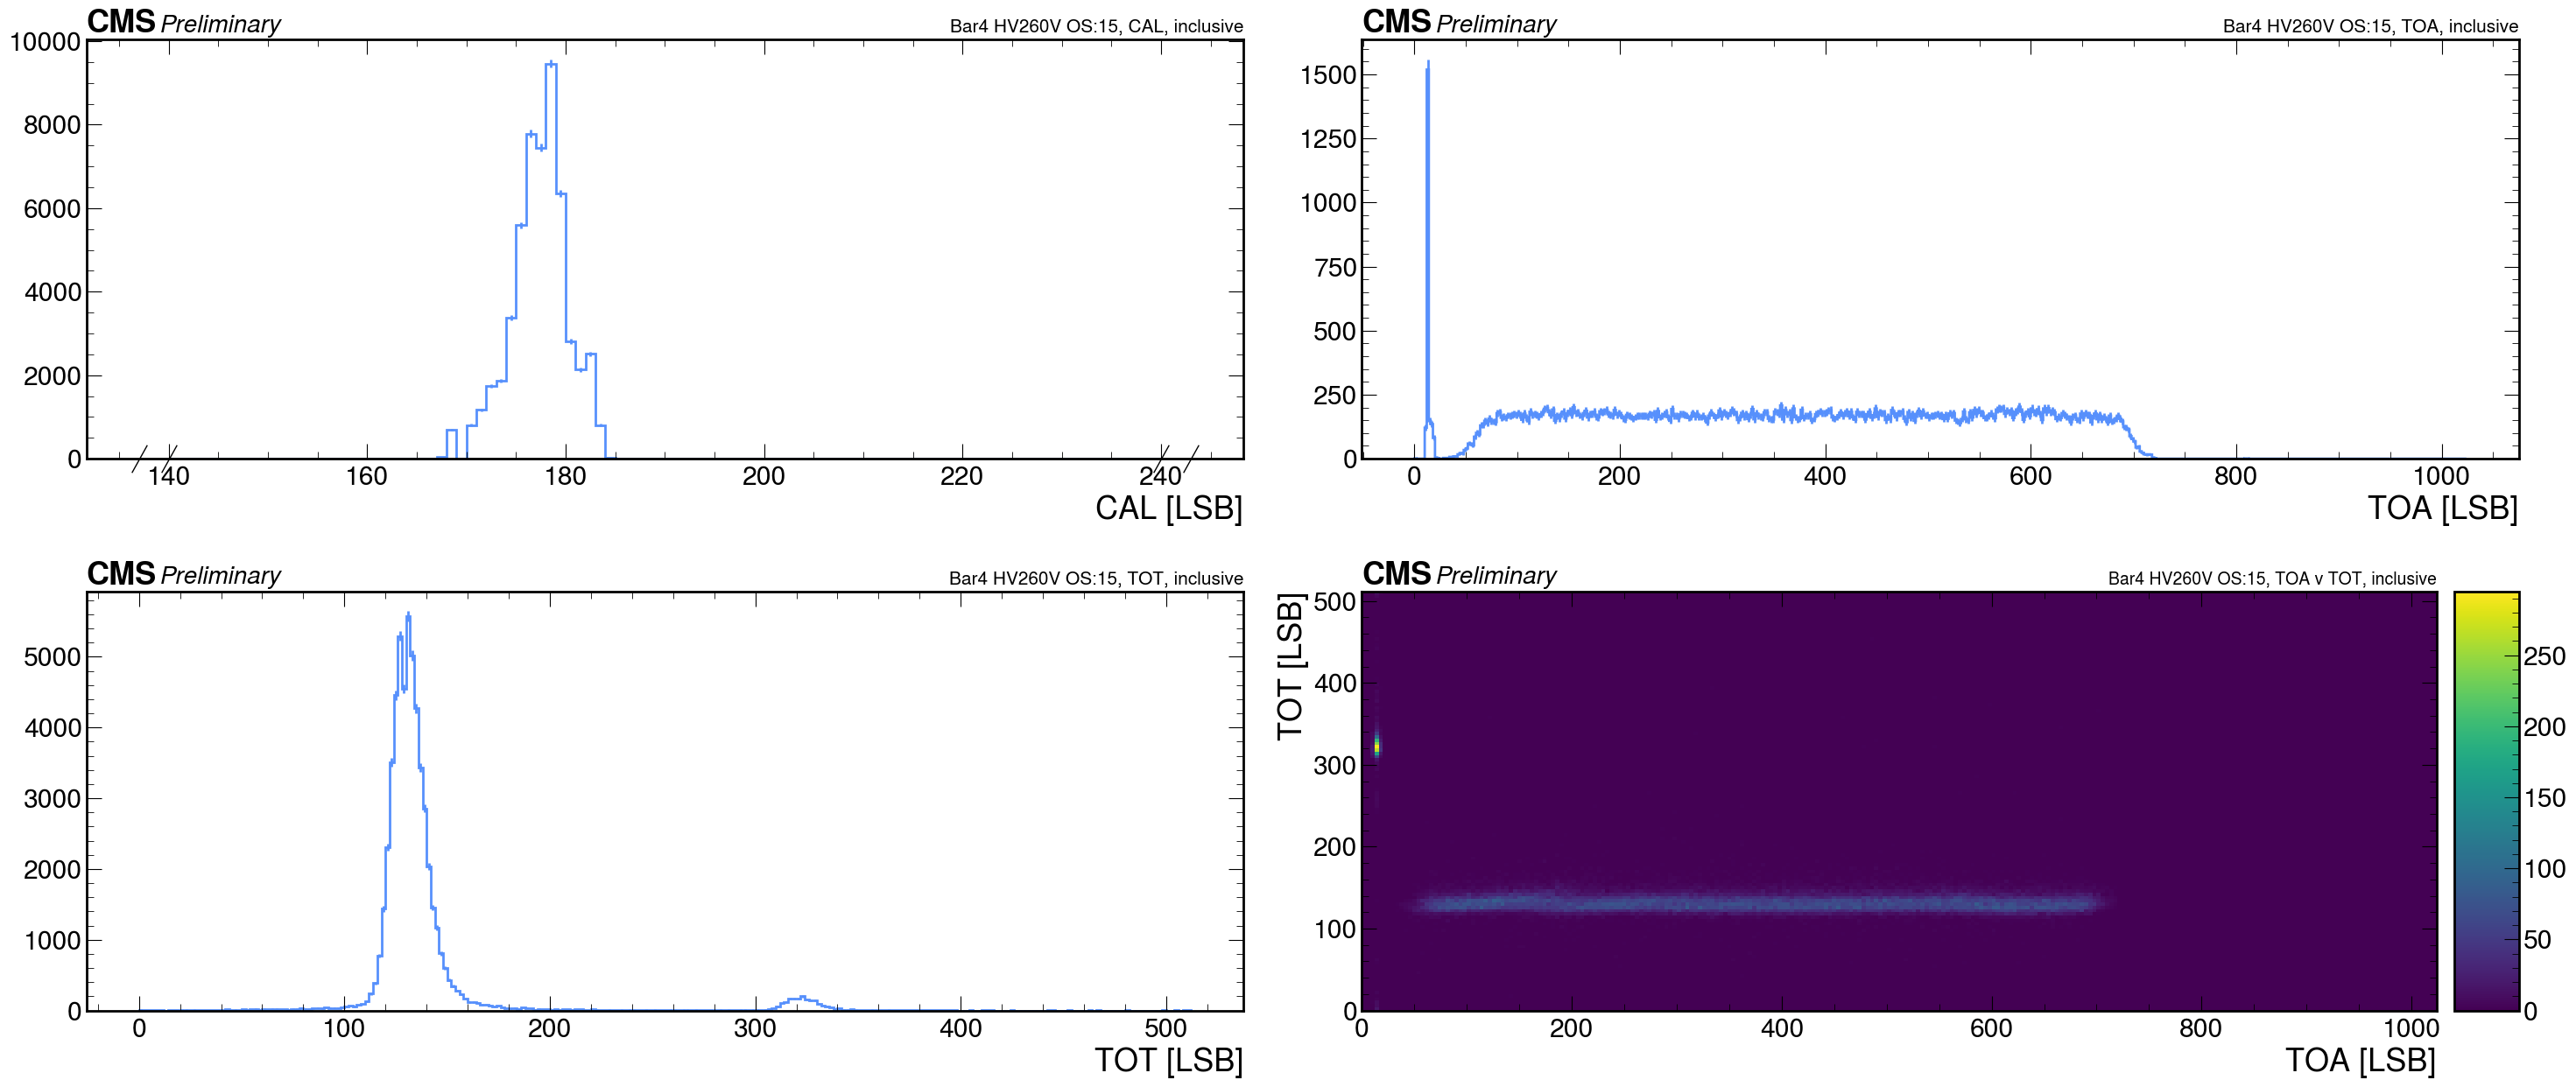

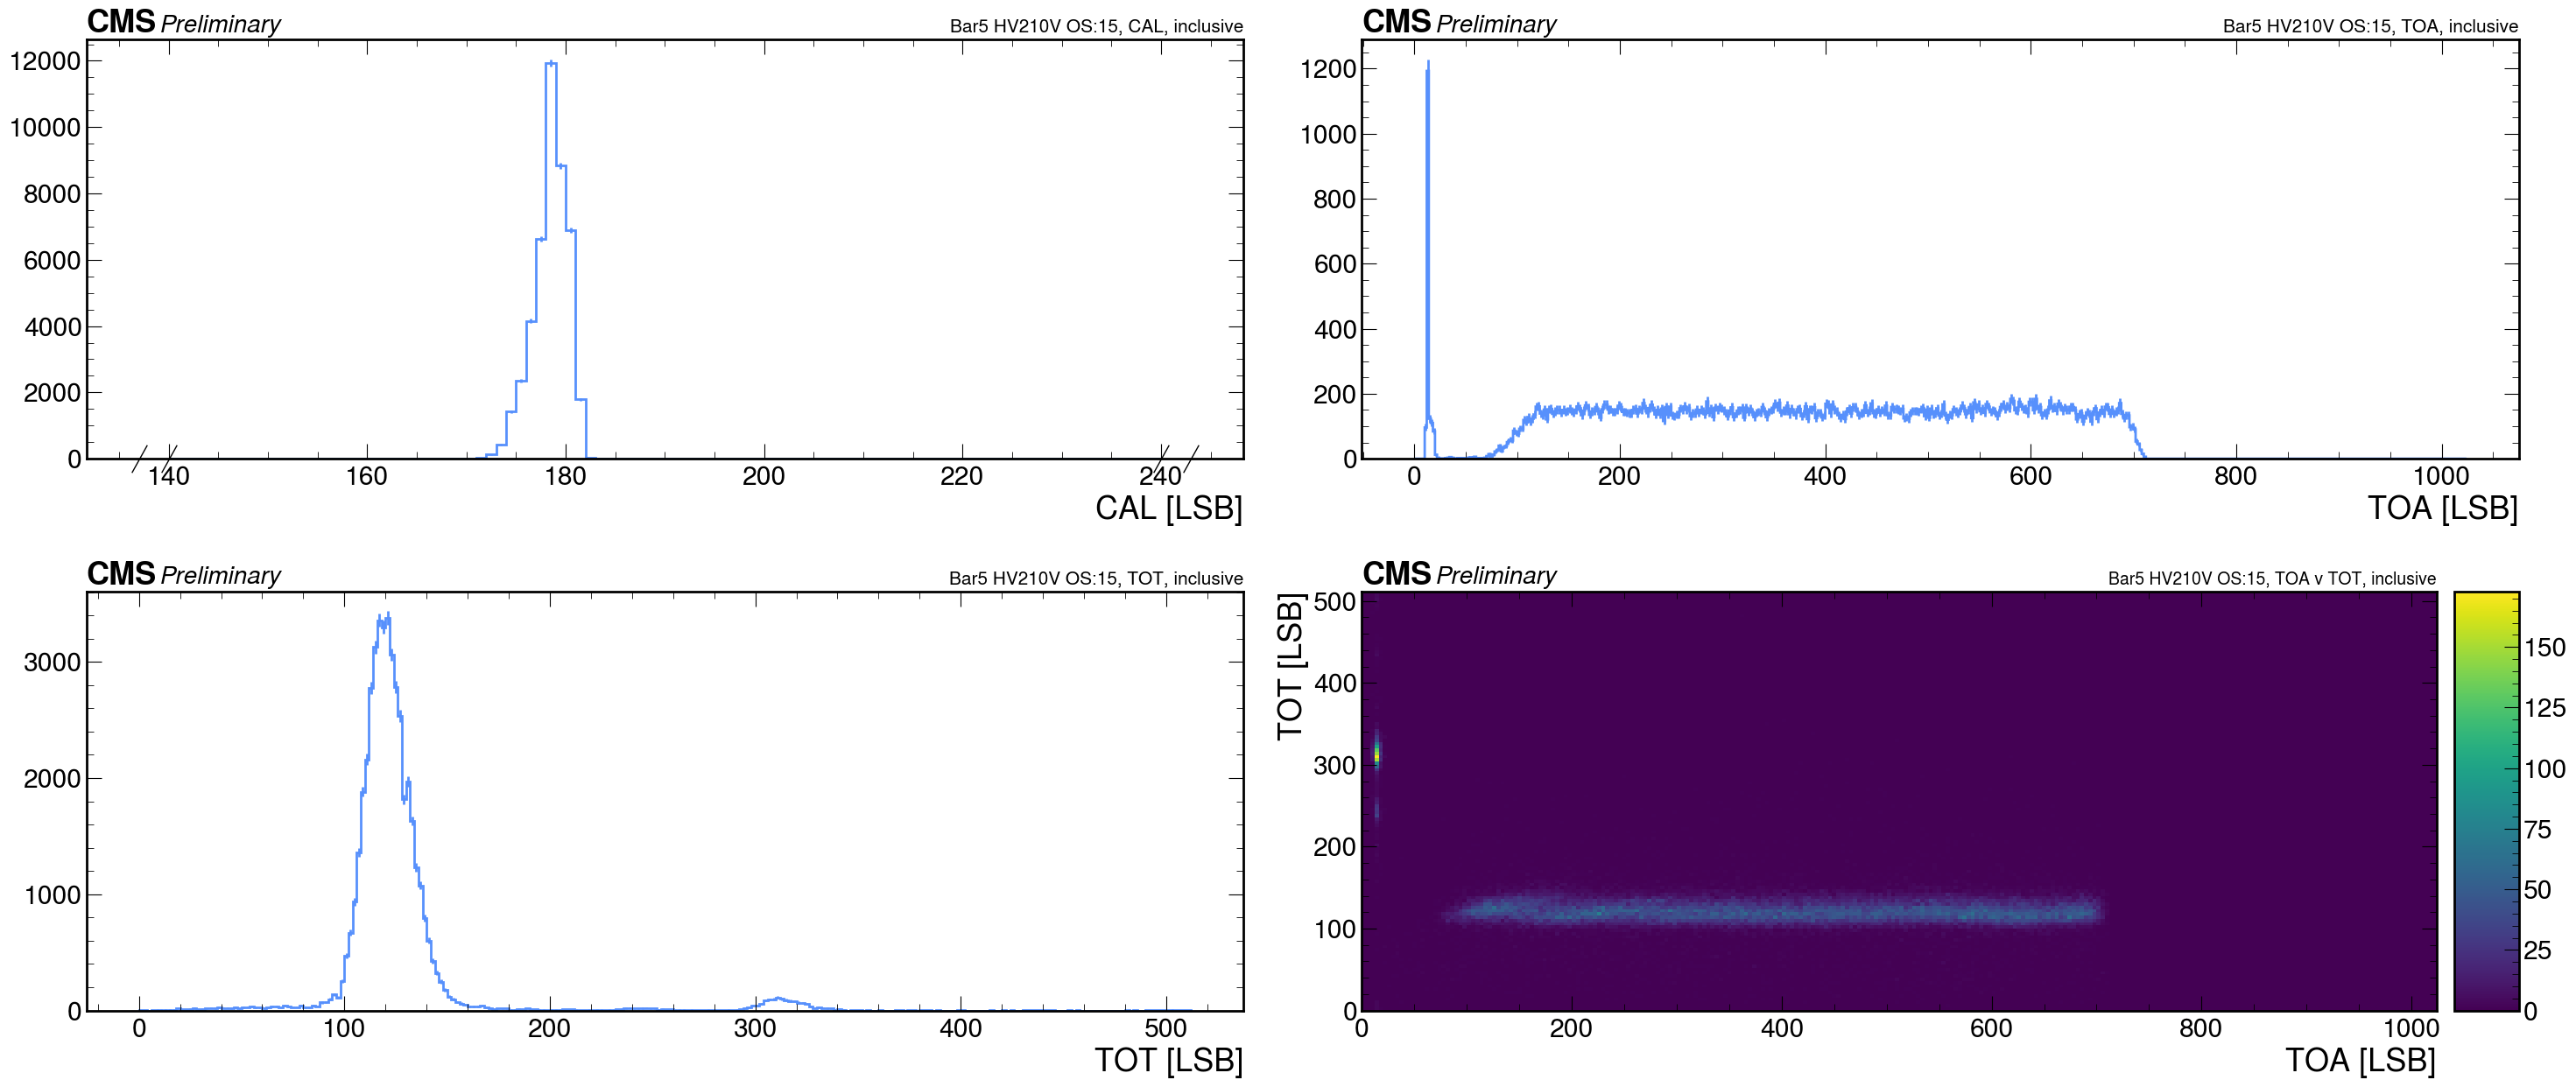

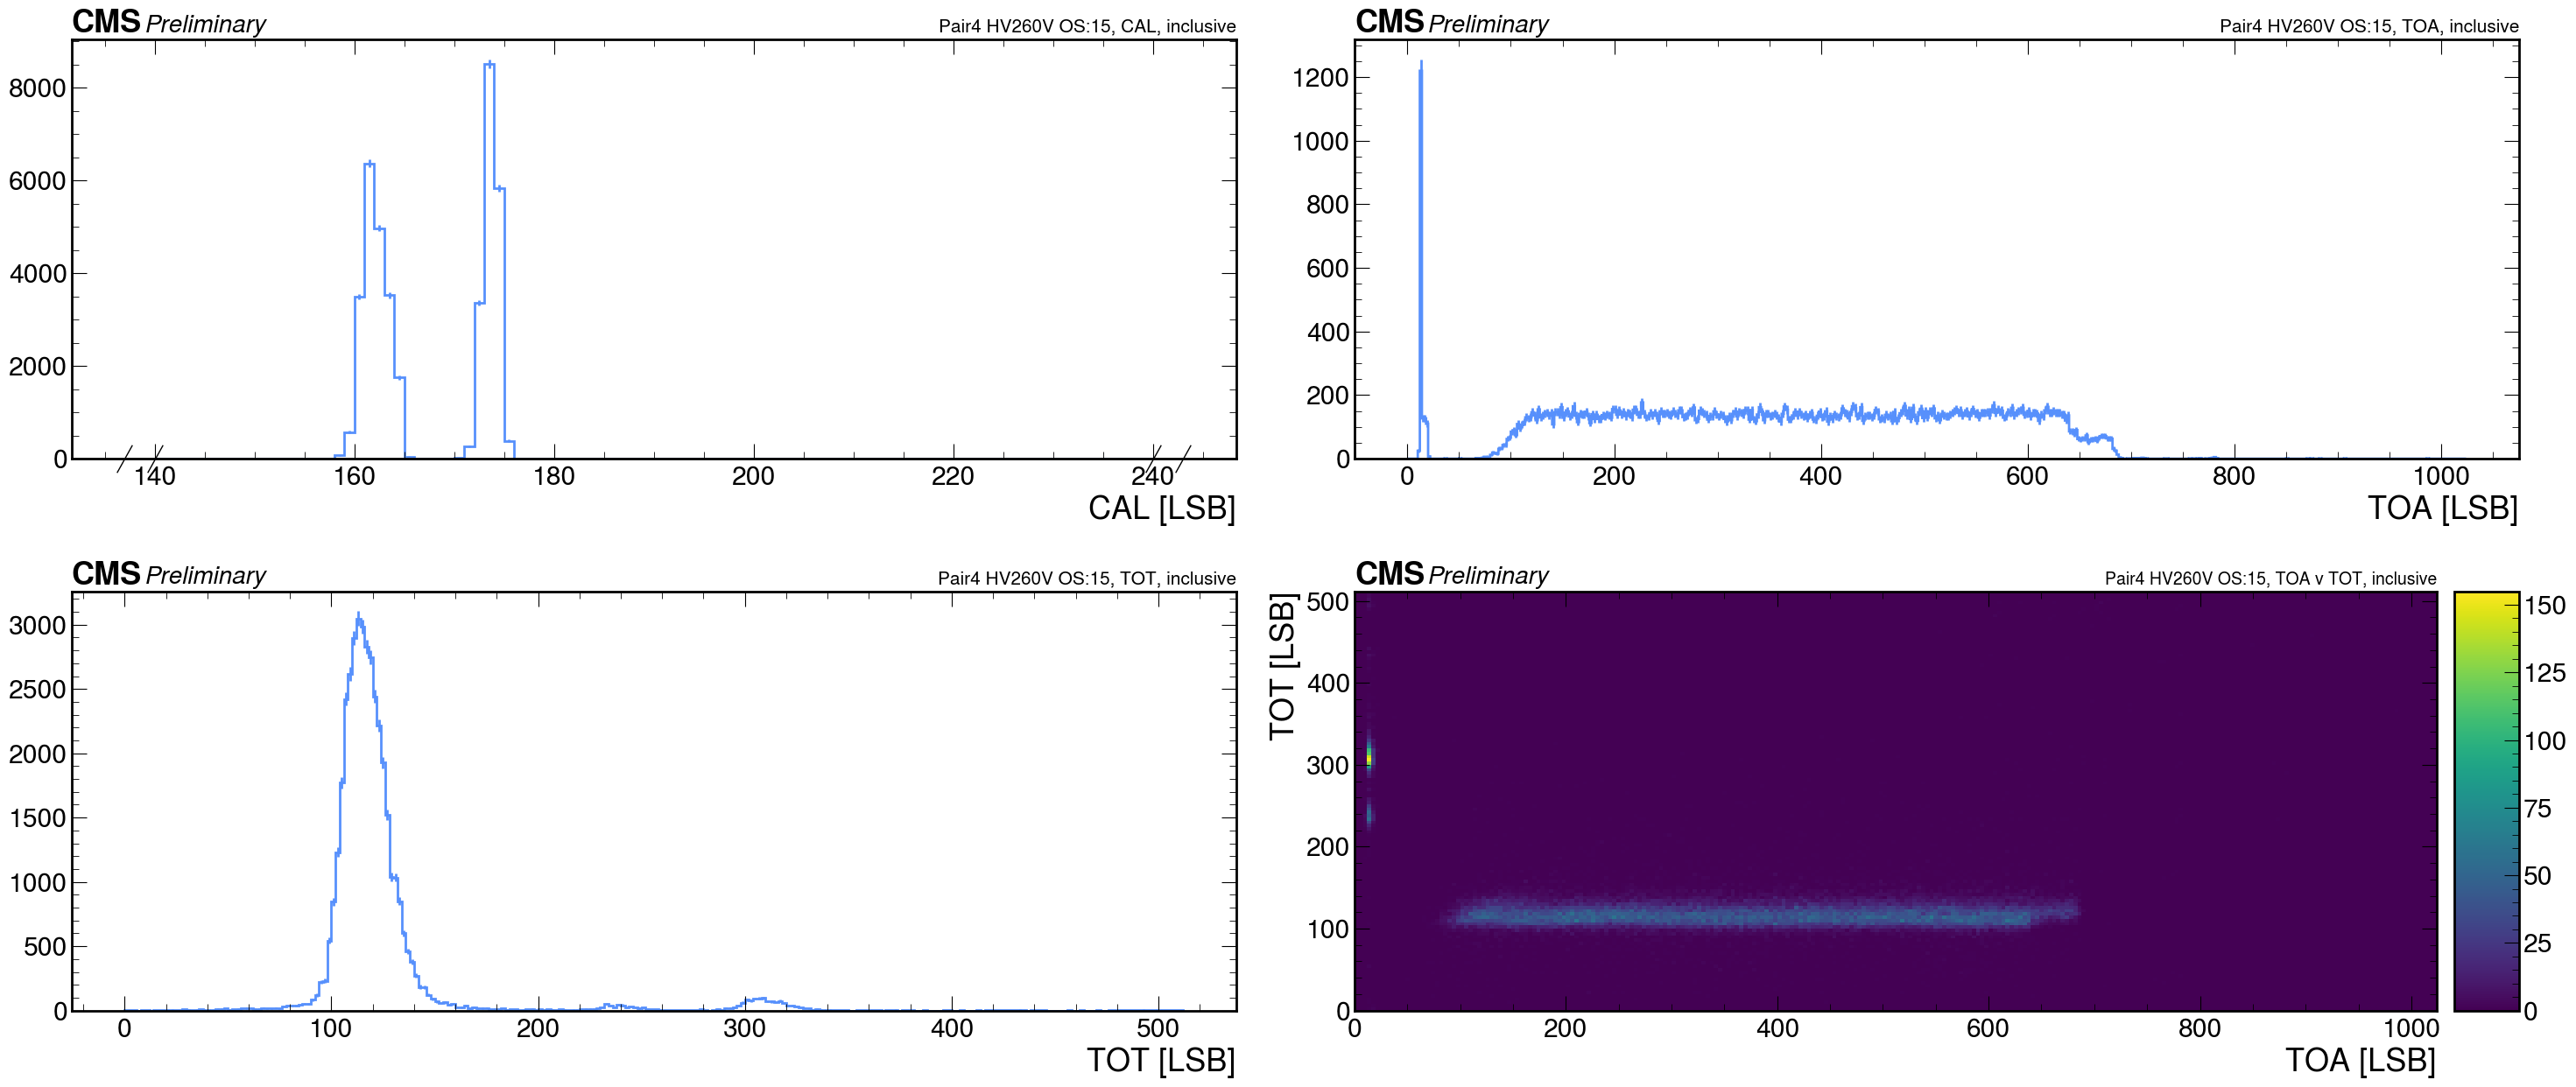

In [130]:
h_inclusive = helper.return_hist(df, chip_names, chip_labels, hist_bins=[100, 256, 512])

helper.plot_1d_TDC_histograms(h_inclusive, chip_names[0], chip_fignames[0], chip_figtitles[0], fig_path, save=False,
                                tag="inclusive", fig_tag=", inclusive", slide_friendly=True)

helper.plot_1d_TDC_histograms(h_inclusive, chip_names[1], chip_fignames[1], chip_figtitles[1], fig_path, save=False,
                                tag="inclusive", fig_tag=", inclusive", slide_friendly=True)

helper.plot_1d_TDC_histograms(h_inclusive, chip_names[2], chip_fignames[2], chip_figtitles[2], fig_path, save=False,
                                tag="inclusive", fig_tag=", inclusive", slide_friendly=True)

helper.plot_1d_TDC_histograms(h_inclusive, chip_names[3], chip_fignames[3], chip_figtitles[3], fig_path, save=False,
                                tag="inclusive", fig_tag=", inclusive", slide_friendly=True)

del h_inclusive